
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, October 22nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Truett Bloxsom (tsb962)
2. Jake Hill (jah8787)

# Question 1 - Stochastic Gradient Descent (30 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 5 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'Adagrad'. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and Adagrad. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and Adagrad (6 plots total). (2pts) Report the MSE at the end of 15 epochs for the two best combinations in each of SGD, SGD-Momentum and Adagrad.

Here are two blogs which you can go through to know about Adagrad - [blog 1](https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827) and [blog 2](http://ruder.io/optimizing-gradient-descent/).


3. (5pts) Based on the experiments, which of the 3 techniques allowed for a larger initial setting of the learning_rate? Why?


## Answer 

### 1.

Answer: 

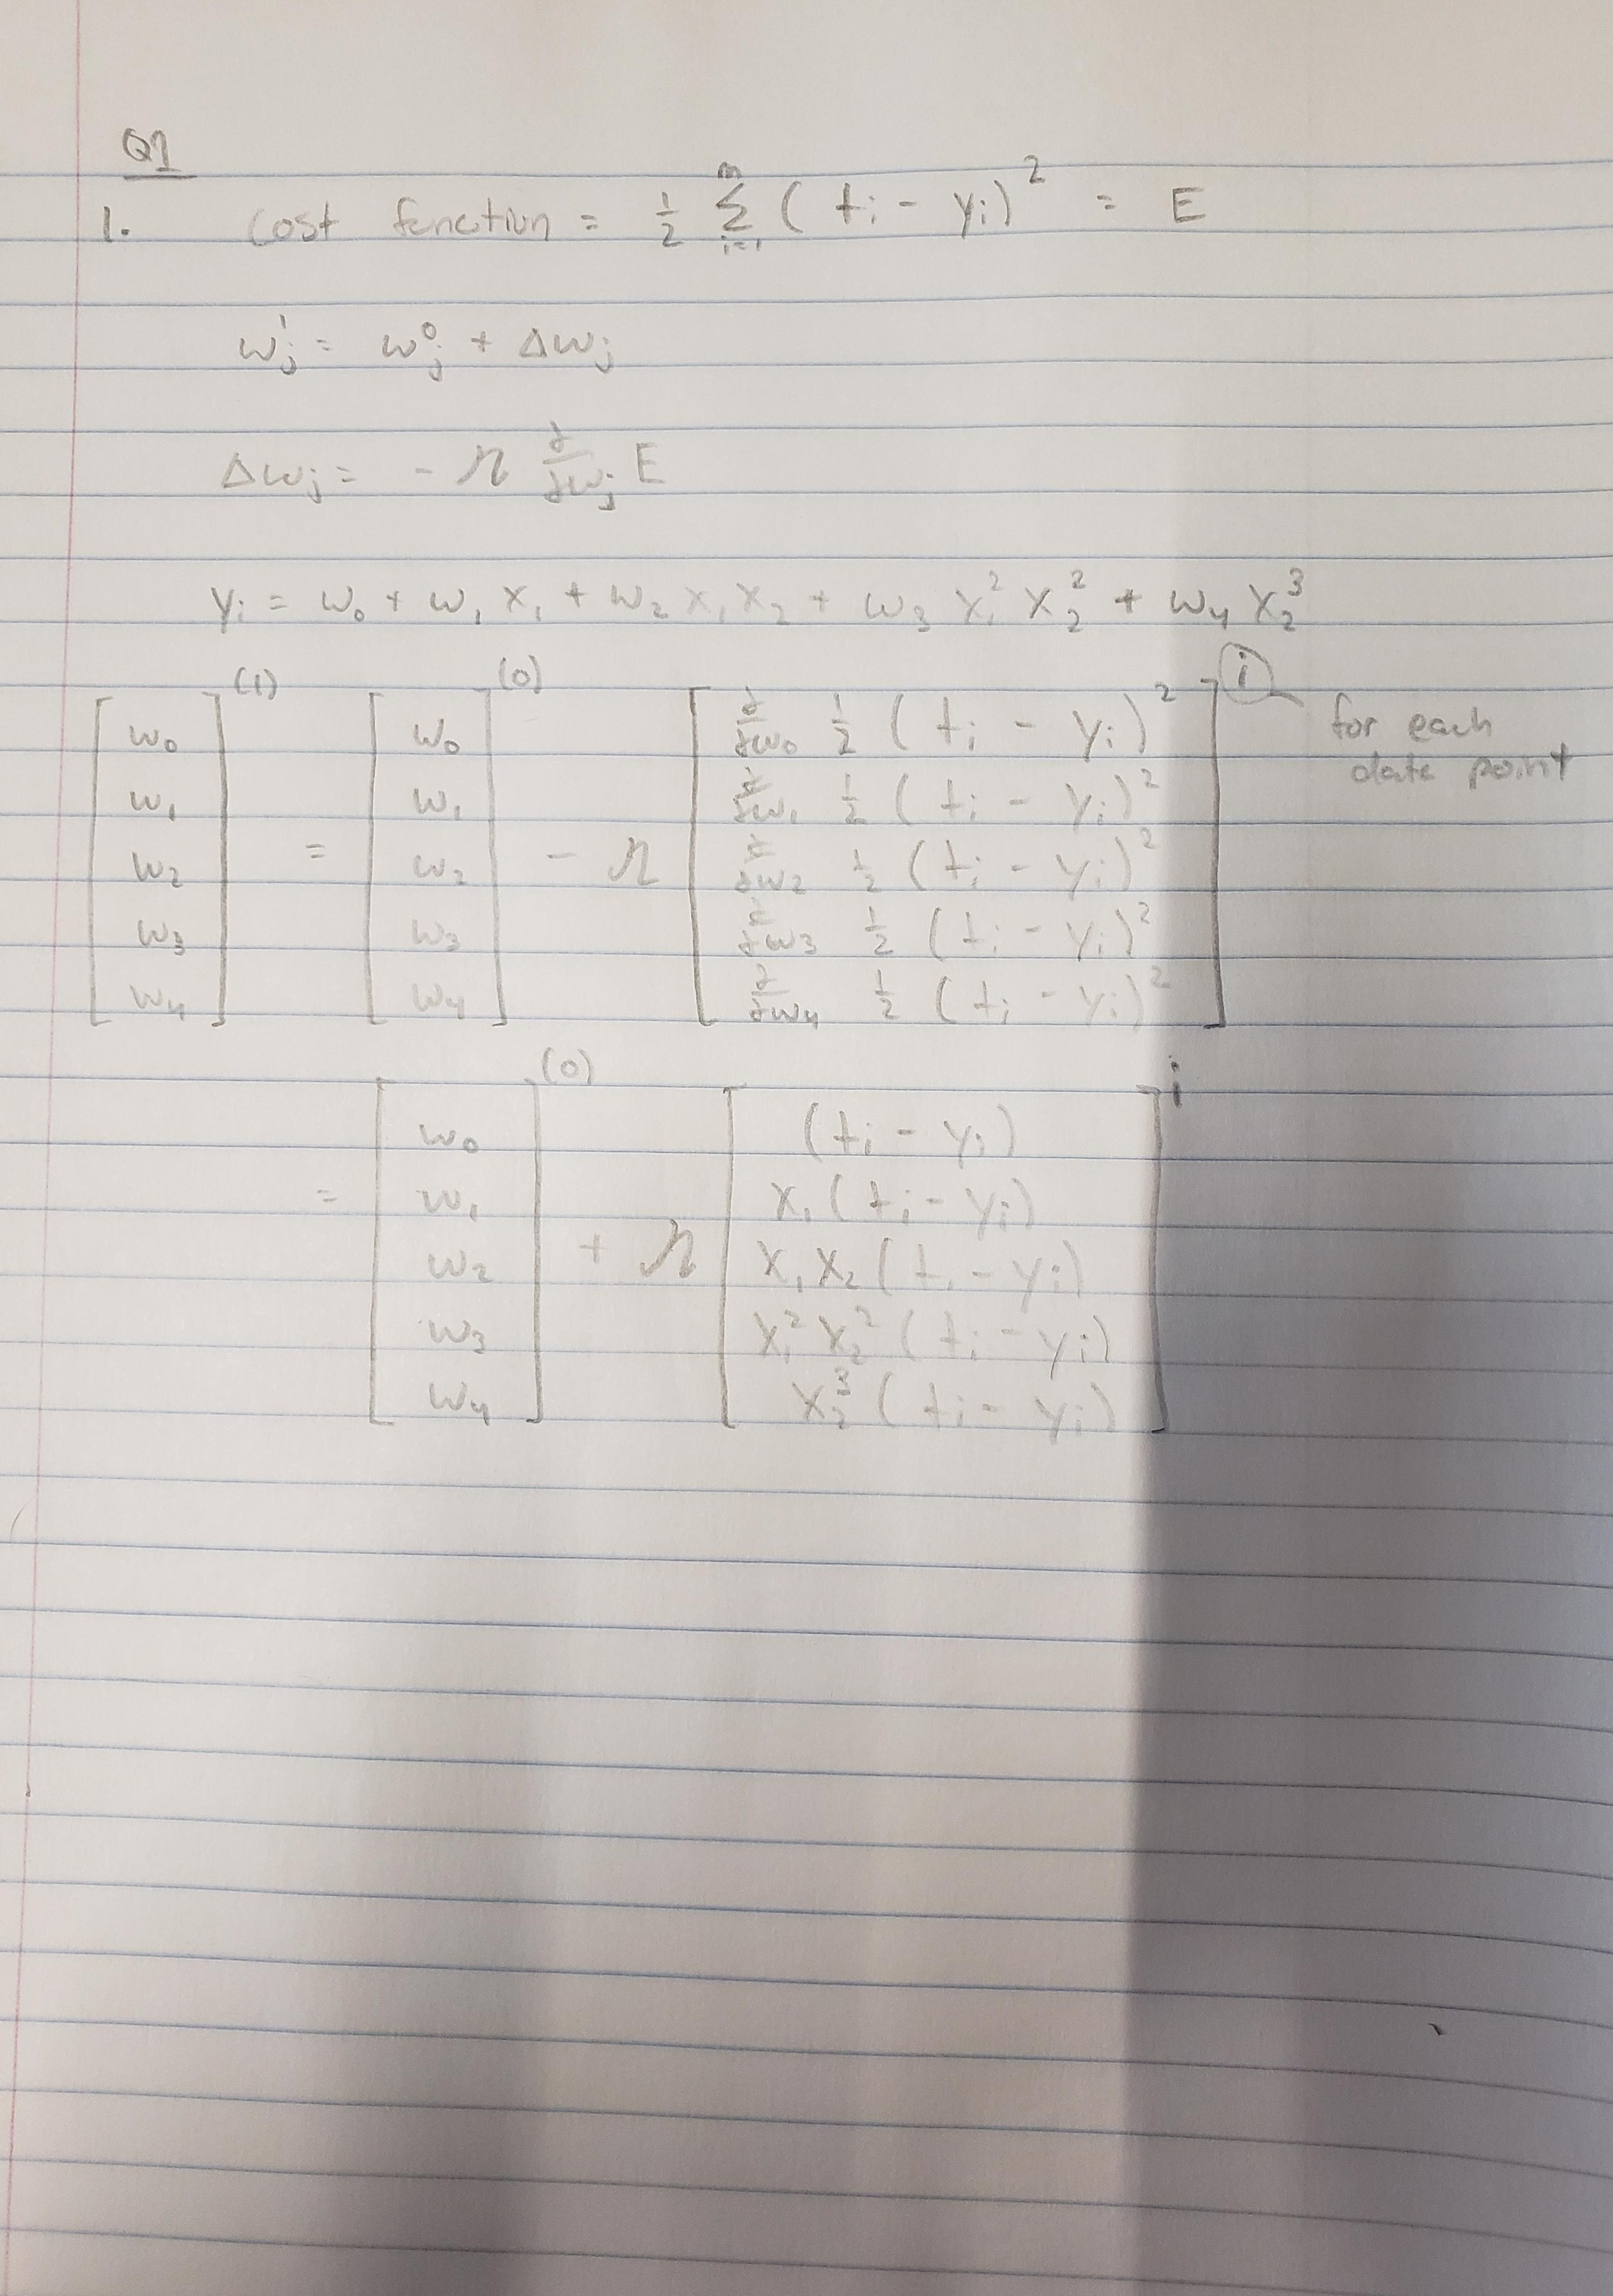

In [167]:
Image("q1_t1.PNG")

### 2.

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(5) #one coef for each of the terms
        self.eps = 10**-6 #used only for adagrad
        self.cache = np.zeros(self.coef.shape) #used only for adagrad
        self.mu = 0.9 #used in momentum
        self.velocity = 0.0


        
    def sgd(self, gradient):
        self.coef = self.coef + (self.learning_rate*gradient - self.learning_rate*self.regularization*self.coef)
        '''
        updates self.coef based on gradient using SGD
        '''
        
    
    def adagrad(self, gradient):
        self.cache = self.cache + gradient**2
        self.coef = self.coef + (self.learning_rate / (np.sqrt(self.cache+self.eps)) * gradient \
                      - self.learning_rate*self.regularization*self.coef)
        '''
        updates self.coef based on gradient using Adagrad
        '''
    
    def sgd_momentum(self, gradient):
        self.cache = self.mu*self.cache + self.learning_rate*gradient
        self.coef = self.coef + self.cache - self.learning_rate*self.regularization*self.coef
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        features = self.get_features(X)
        
        self.weight_list = []
        self.mse_list = []
        
        for epoch in range(self.n_epoch):
            self.cache = np.zeros(self.coef.shape)
            for point in range(len(X)):
                prediction = self.linearPredict(features[point])
                loss = y[point] - prediction
                gradient = loss*features[point]
                self.gradient = gradient
                
                if update_rule == "sgd":
                    self.sgd(gradient)
                elif update_rule == "sgd_momentum":
                    self.sgd_momentum(gradient)
                elif update_rule == "adagrad":
                    self.adagrad(gradient)
                
                if(point == len(X) -1):
                    self.weight_list.append(self.coef)
                    self.mse_list.append(np.mean((y - self.linearPredict(features))**2))
                    
        if plot:
            plt.plot(range(self.n_epoch), self.mse_list)
            plt.ylabel('mse')
            plt.xlabel("n_epoch")
            plt.show()
            
            plt.plot(range(self.n_epoch), self.weight_list)
            plt.ylabel('weights')
            plt.xlabel("n_epoch")
            plt.show()
        
        '''
        Fits the model for the given X, y. It uses the update rule mentioned by the parameter update_rule
        and displays a plot of the coefficients vs epochs and mse vs epochs if plot is True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the respective update rule and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''

    def get_features(self, X):
        features = pd.DataFrame(X, columns = ["x1", "x2"])
        features.insert(value = 1, loc = 0, column = "constant")
        features["x1*x2"] = features["x1"]*features["x2"]
        features["x1^2*x2^2"] = features["x1"]**2*features["x2"]**2
        features["x2^3"] = features["x2"]**3
        features.drop(["x2"], axis = 1, inplace = True)
        return features.values
      
        
        
    def linearPredict(self, X_features):
        prediction = np.dot(X_features, self.coef)
        return prediction
      

In [2]:
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

### Using SGD


In [3]:
result = []
for l in learning_rate:
    for r in regularization:
        reg = LinearRegression(learning_rate= l, regularization= r, n_epoch= n_epochs)
        results = reg.fit(X, y, update_rule='sgd', plot=False)
        best_epoch = reg.mse_list.index(min(reg.mse_list))
        mse = reg.mse_list[best_epoch]
        result.append((l, r, mse))

C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in add
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in square
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in multiply
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


In [5]:
from operator import itemgetter
result.sort(key = itemgetter(2), reverse = False)

print(result[0][0])
print(result[0][1])
print("mse =", result[0][2])

0.001
0
mse = 0.020878097917959082


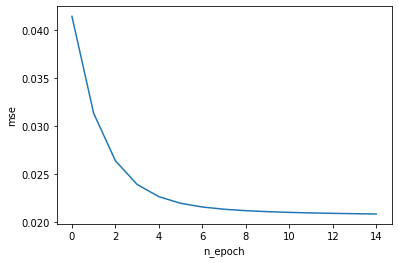

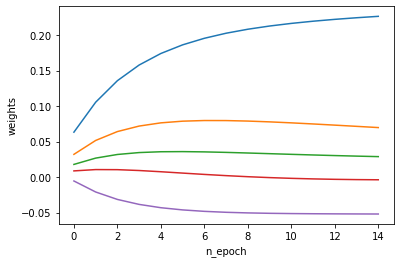

In [6]:
reg = LinearRegression(0.001, 0, n_epochs)
results = reg.fit(X, y, update_rule='sgd', plot=True)

In [7]:
print(result[1][0])
print(result[1][1])
print("mse =", result[1][2])

0.01
0
mse = 0.021781768945026432


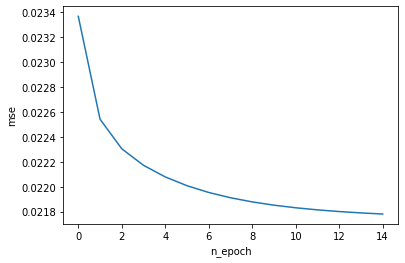

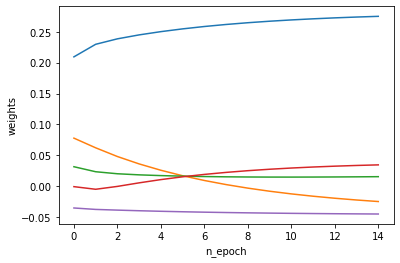

In [8]:
reg = LinearRegression(0.01, 0, n_epochs)
results = reg.fit(X, y, update_rule='sgd', plot=True)

### Using SGD-Momentum

In [9]:
result = []
for l in learning_rate:
    for r in regularization:
        reg = LinearRegression(learning_rate= l, regularization= r, n_epoch= n_epochs)
        results = reg.fit(X, y, update_rule='sgd_momentum', plot=False)
        best_epoch = reg.mse_list.index(min(reg.mse_list))
        mse = reg.mse_list[best_epoch]
        result.append((l, r, mse))

C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in square
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in multiply
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in add
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in multiply
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in add
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in add
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packag

In [10]:
result.sort(key = itemgetter(2), reverse = False)

print(result[0][0])
print(result[0][1])
print("mse =", result[0][2])

0.001
0
mse = 0.020273688696143415


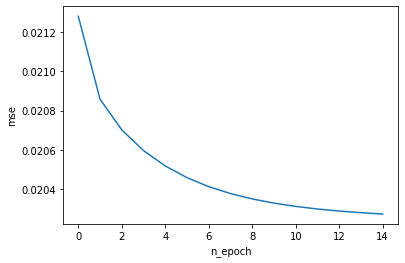

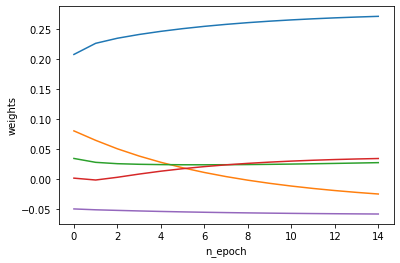

In [11]:
reg = LinearRegression(0.001, 0, n_epochs)
results = reg.fit(X, y, update_rule='sgd_momentum', plot=True)

In [12]:
print(result[1][0])
print(result[1][1])
print("mse =", result[1][2])

0.0001
0
mse = 0.02089342087250308


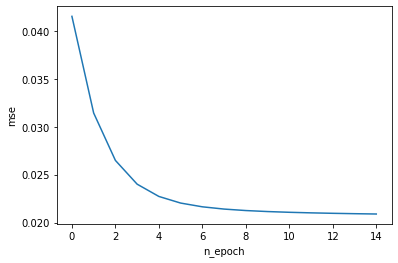

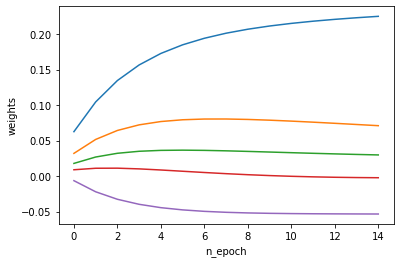

In [13]:
reg = LinearRegression(0.0001, 0, n_epochs)
results = reg.fit(X, y, update_rule='sgd_momentum', plot=True)

### Using Adagrad

In [14]:

result = []
for l in learning_rate:
    for r in regularization:
        reg = LinearRegression(l, r, n_epochs)
        results = reg.fit(X, y, update_rule = "adagrad",plot=False)
        best_epoch = reg.mse_list.index(min(reg.mse_list))
        mse = reg.mse_list[best_epoch]
        result.append((l, r, mse))
        

C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\tsblo\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in multiply


In [15]:
result.sort(key = itemgetter(2), reverse = False)

print(result[0][0])
print(result[0][1])
print("mse =", result[0][2])

0.01
0
mse = 0.020334684330254548


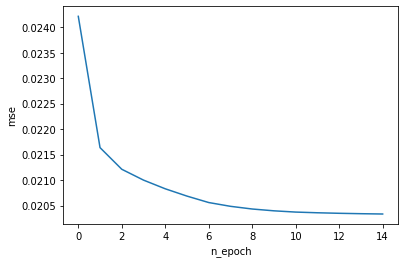

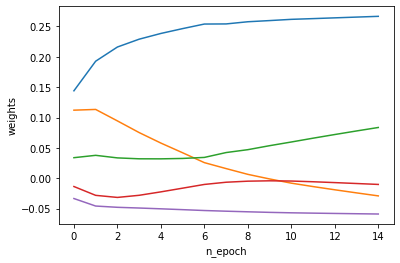

In [16]:
reg = LinearRegression(0.01, 0, n_epochs)
results = reg.fit(X, y, update_rule = "adagrad", plot=True)

In [17]:
print(result[1][0])
print(result[1][1])
print("mse =", result[1][2])

0.1
0
mse = 0.021782623635487705


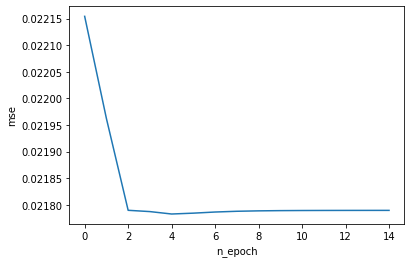

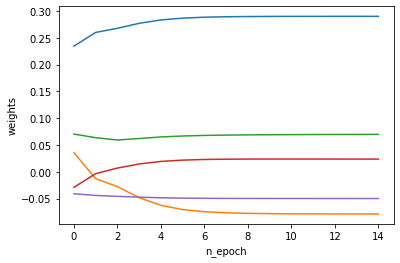

In [19]:
reg = LinearRegression(0.1, 0, n_epochs)
results = reg.fit(X, y, update_rule = "adagrad", plot=True)

### 3.

Ans. the adagrad algorith allowed the initial learning rate to be higher since this algorithm adaptively scaled the learning rate for each dimension. it decreases the learning rate faster for frequent parameters, and slower for infrequent parameter. 

# 2.  Tensor Playground (25pts)
Visit http://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the 4th of the four data sets (the spiral data which is bottom right).  

1) Use the following default settings - test/training ratio 50%, Noise 0, Batch Size 10, learning rate 0.03, one hidden layer with 4 neurons, input as X_1, X_2 and no Regularization. Run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs(4 values). What difference do you observe in the decision boundary? Why? (4 pts)

2) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Report the train, test losses at the end of 1000 epochs for 2, 4, and 8 neurons in the hidden layer (6 values). What do you observe in the decision boundary as the number of neurons increases? Why? (4 pts)

3) Use the above setting, set the activation to be Tanh and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 3, 0.3, 0.03 and 0.003 (8 values). What do you observe in the loss curves? Explain. (4 pts)

4) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Use two hidden layers - first hidden layer with 6 neurons and second hidden layer with 4 neurons. Report the train, test values at the end of 2000 epochs (2 values) and attach the screenshot from Tensor playground. Explain the changes you see with this additional hidden layer. (5 pts).

5) Fix the test/training ratio 50% and Noise to 0 (same as before). Play around with any of the other hyperparameters, network architectures and input features (such as $sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be atmost 0.06). Attach the screenshot from  Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc.  (8 pts)
 

### ANSWER

### 1. 
Tanh activation function: train error = 0.370, test error = 0.434
Linear activation function: train error = 0.470, test error = 0.481

The linear activation function just fits a strait line through the data. The Tanh activation function has a zig zag decision boundary. This is because the Tanh activation function is a non-linear scaled sigmoid function. This means that unlike a linear activation function, the Tanh function will have a tendency to bring the Y values to either end of the curve. Looking at each individual neuron using the Tanh function, the decision boundary is very thin and linear and the respective weights are large. Where as the Linear activation nuerons have a very wide linear boundary with very small weights. So combining the different linear Tanh neurons more easily allows for a nonlinear decision boundary than the linear activation function. 

### 2. 
2 neurons: train error =  0.423, test error = 0.483
4 neurons: train error = 0.402, test error = 0.452
8 neurons: train error = 0.234, test error = 0.306

The decision boundary becomes more non-linear as the number of neurons increases. This is becuase each neuron fits a different linear boundary (becuase we only allow for linear features) and combining more and more linear boundaries together can increase the non-linearity of the output decision boundary. Its like polynomial regression: as you increase the number of polynomials, you increase the models ability to fit more complex, non-linear functions. 

### 3.
learning rate = 3
100 epochs: train error =  0.575, test error = 0.640
1000 epochs: train error =  0.549, test error = 0.618

learning rate = .3
100 epochs: train error =  0.449, test error = 0.512
1000 epochs: train error =  0.399, test error = 0.482

learning rate = .03
100 epochs: train error =  0.471, test error = 0.485
1000 epochs: train error =  0.361, test error = 0.414

learning rate = .003
100 epochs: train error =  0.473, test error = 0.481
1000 epochs: train error =  0.469, test error = 0.480

the loss curve at a high training rate has a very high variance at the beggining and slowly settles down. As you decrease the learning rate, the variance decreases. The highest and lowest learning rates tend to flat line in both train and test error after 100 or so epochs but the middle learning rates tend to keep decreasing in train and test error as the epochs increase. The high variance in the largest learning rate model is caused by the large steps at each point and could have jumped over the minimum, could have diverged, or jumps around the minimum. The lowest learning rate caused the jump to be so small that it never got close to a minimum and that is what caused the flat line. The middle learning rates kept decreasing becuase their jumps at each point were not too big to jump over a minimum and not too small to stop moving at a platue or small slope.  

### 4.

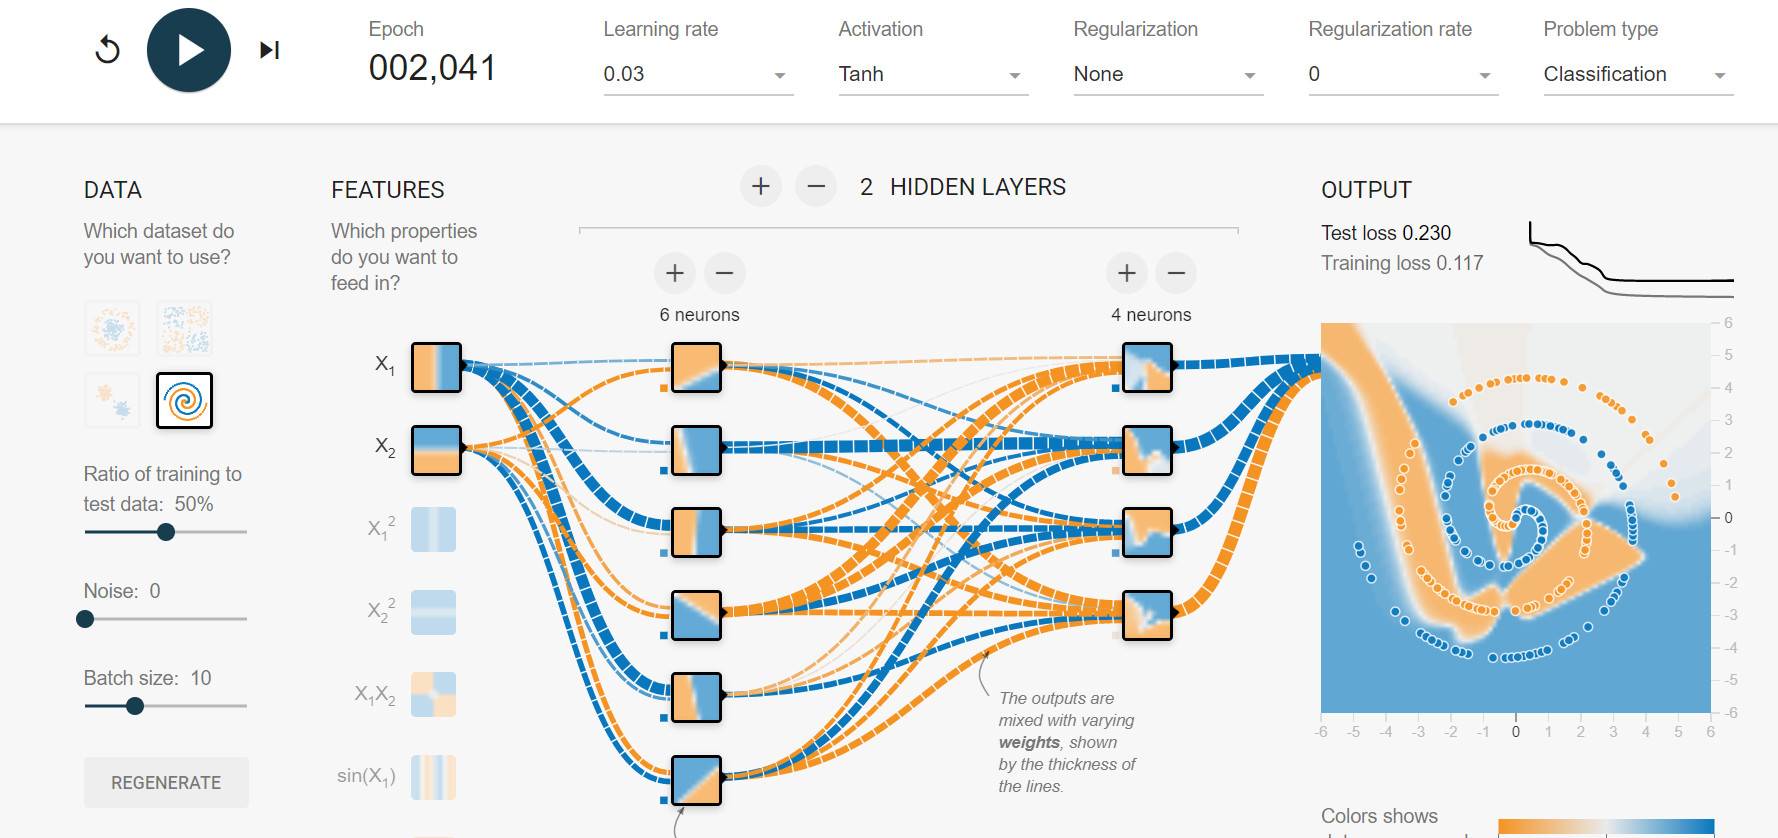

In [97]:
#PART 2
from IPython.display import Image
Image("q2_4.PNG")

train error = 0.117, test error = 0.229

The biggest change is that the second hidden layer neurons have non-linear decision boundaries. This is becuase all of the first hidden layer neurons interact with each of the second hidden layer neurons. Each of the second hidden layer neurons is like an output of a neural network with just one hidden layer. This allows for even greater non-linear, flexible decision boundaries for the output, since instead of combining 4 or 6 linear decision boundaries like a single layer is able to do, two hidden layers can combine non-linear decision boundaries together. 

### 5.

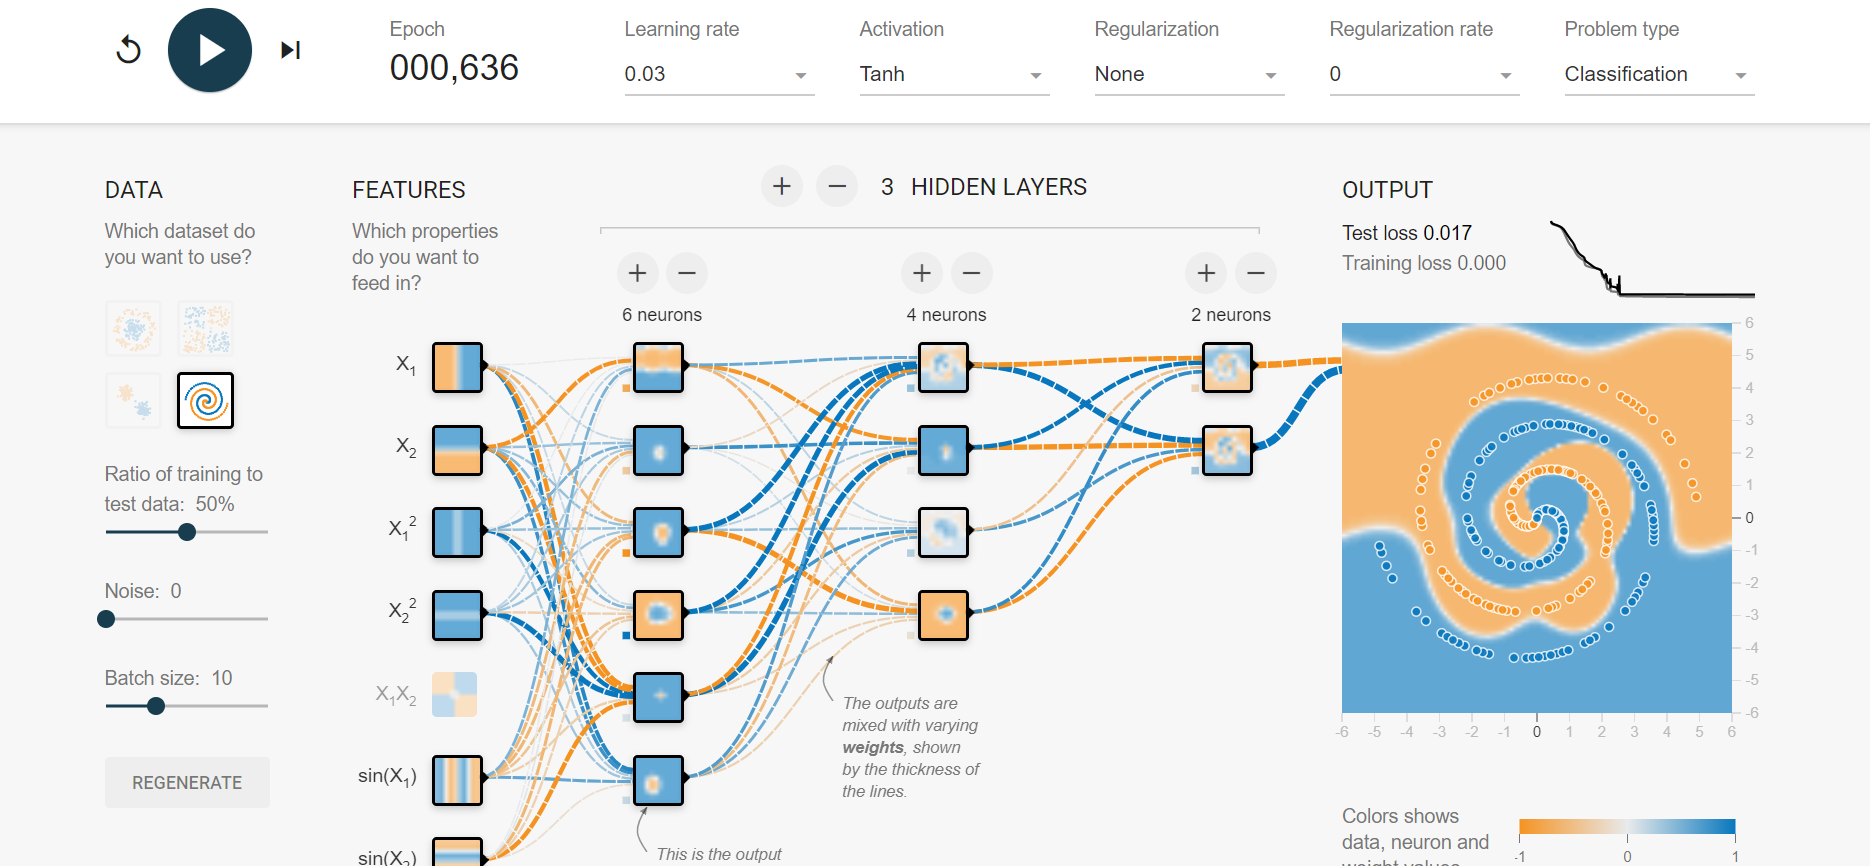

In [105]:
Image("q2_5.PNG")

train error = 0.000, test error = 0.017

I created a third hidden layer since trying to fit with two layers did not allow for enough flexibility in the final decision boundary. I used all of the features except the interaction term because using the interaction term tended to use decision boundaries in the first layer that cut across the points leading to overfitting. Using most of the features allowed the first layer neurons to have non-linear decisions boundaries which improved the fit in the following layers. I used 4 neurons on the second layer and 2 neurons on the third layer becuase it tended to smooth out the decision boundary and reduce likelihood of overfitting. 6 neurons for the first layer seemed to work best, too few would underfit and too many would overfit the data. 

# Question 3: Decision Trees

1. (5pts) In this question, we will learn to build a Decision Tree classifier. Load the q3_dataset.csv from the files. The column named 'label' is the $Y$ we are trying to predict using the features given in all other columns. As usual, we first split the data in a train and test set and build our model on train set and test the performance on the test set. Use the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) to fit a model with default parameters and report its performance on the test data. Now, visualize the tree, for visualisation, if your classifier object is called clf, use the given commands to save the generated tree as a '.dot' file using export_graphviz(https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) and paste the contents of the file in Webgraphviz (http://www.webgraphviz.com/) to generate the tree.


In [20]:
## read data
data = pd.read_csv('q3_dataset.csv')
x = data.drop(['label'],axis=1)
y = data.label.values

In [21]:
pd.set_option('display.max_columns', 500)

In [22]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [185]:
y[:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [246]:
## create train/test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [170]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [172]:
n_correct = sum(y_pred == y_test)
print("accuracy on test set =", n_correct / len(y_pred))

accuracy on test set = 0.9473684210526315


In [173]:
## save tree as .dot
##from sklearn.tree import export_graphviz
##with open("file_name.dot", 'w') as f:
##    f = export_graphviz(clf, out_file=f)

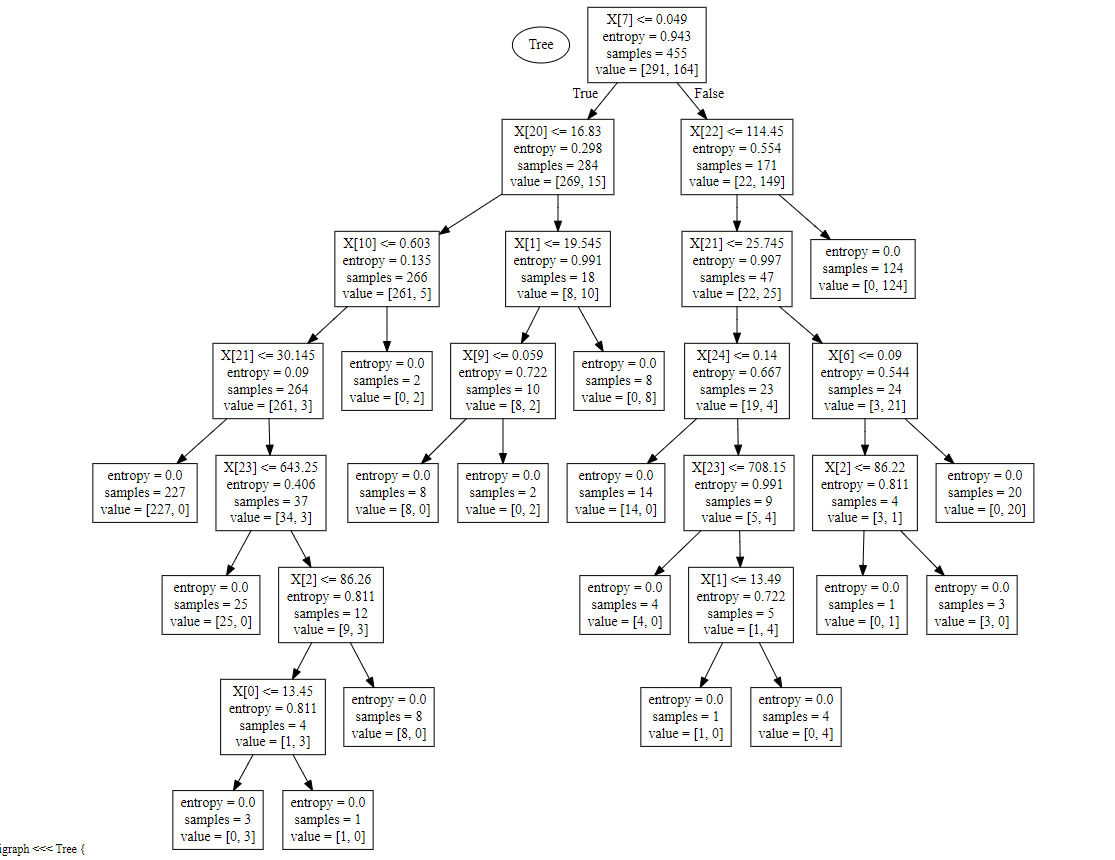

In [174]:
Image("q3_1.PNG")

2. (10pts) We can guide the learning of a Decision Tree classifier by specifying various parameters governing its construction. For example, the max_depth parameter forces the algorithm to stop after at most that many levels, the min_samples_split parameter lower bounds the amount of data required to split nodes when learning and the parameter called criterion determines what function to use to create splits at each node. For both type of criteria, gini and entropy, test the max_depth values in the range 1, 2, ..., 20 , and min_samples_split in the range $2^{1}, 2^{2}, ..., 2^{15}$. Visualise the best classification trees that you get for different criterion parameter and observe how do they differ. 

In [275]:
#this was just to play with gridsearch and is not appart of my answer!
from sklearn.model_selection import GridSearchCV

param_grid = [{"criterion": ["entropy", "gini"], "max_depth": list(np.linspace(1,20, num =20)), "min_samples_split": list(2**np.linspace(1,15, num = 15).astype(int))}]

grid_search = GridSearchCV(clf, param_grid, cv = 3, verbose=3, n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   22.3s finished


{'criterion': 'entropy', 'max_depth': 7.0, 'min_samples_split': 2}

In [244]:
max_depth = list(np.linspace(1,20, num =20))
min_sample_split = list(2**np.linspace(1,15, num = 15).astype(int))

In [271]:
result = []

for depth in max_depth:
    for split in min_sample_split:
        clf = DecisionTreeClassifier(random_state= 0, criterion="gini", min_samples_split = split, max_depth= depth)
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        
        result.append((depth, split, accuracy))

In [272]:
result.sort(key = itemgetter(2), reverse = True)

print("depth",result[0][0])
print("split",result[0][1])
print("accuracy", result[0][2])

depth 2.0
split 256
accuracy 0.9736842105263158


In [252]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2.0, min_samples_split=256)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2.0,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=256,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [253]:
with open("file_1.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

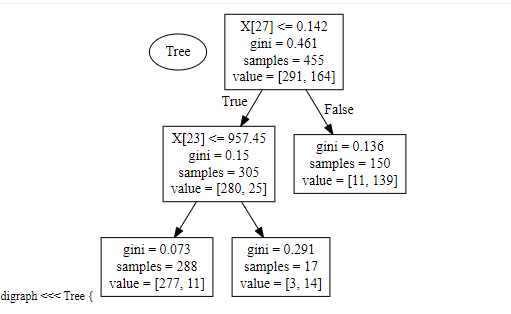

In [254]:
Image("q3_simple_gini.PNG")

In [31]:
x.iloc[:, 26].describe()

count    569.000000
mean       0.272188
std        0.208624
min        0.000000
25%        0.114500
50%        0.226700
75%        0.382900
max        1.252000
Name: concavity_worst, dtype: float64

In [273]:
result = []

for depth in max_depth:
    for split in min_sample_split:
        clf = DecisionTreeClassifier(random_state = 0, criterion="entropy", min_samples_split = split, max_depth= depth)
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        
        result.append((depth, split, accuracy))

In [274]:
result.sort(key = itemgetter(2), reverse = True)

print("depth",result[0][0])
print("split",result[0][1])
print("accuracy", result[0][2])

depth 3.0
split 32
accuracy 0.9649122807017544


In [267]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3.0, min_samples_split=32)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3.0,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [269]:
with open("file_2.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

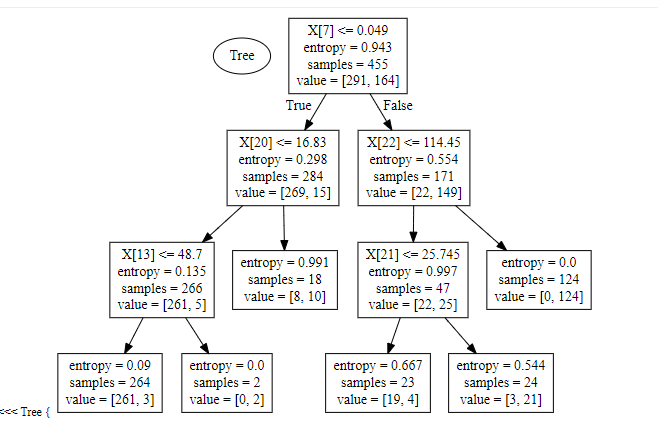

In [270]:
Image("q3_simple_entropy.PNG")

In [34]:
x.iloc[:, 6].describe()

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64

the largest difference between the two trees is that the best gini had a max depth of 2 and uses different X's to split on compared to the entropy tree. the gini tree also preformed better than the entropy tree based on accuracy. 

## Question 4: Bayes Optimal Classification (5 pts)

1. Consider the following classification problem with only one input feature. We have two biased coins, coin 1 and 2. For coin 1, $P(heads) = p$ and for coin 2, $P(heads) = q$. We know that $p > q$. Given the output of a coin toss, we have to predict which coin was used for this toss. Assume we select both the coins for tossing with equal probability. What is the Bayes optimal classifier and what is its error rate?

The optimal classifier is if given coin, there is a 50% probability of being Coin 1 and 50% probability of being Coin 2. 
So:

the Pr(Coin 1|Heads) = p/(p+q),

the Pr(Coin 2|Heads) = q/(p+q),

the pr(Coin 1|Tails) = (1-p)/((1-p)+(1-q)),

the pr(Coin 2|Tails) = (1-q)/((1-p)+(1-q))

if the coin is heads, predict Coin 1 since p > q,
if the coin lands tails, predict Coin 2

the error rate of predicting Coin 1: q/(p+q),

the error rate of predicting Coin 2: (1-p)/((1-p)+(1-q))

the total error rate would be: (1-(q/(p+q))) + (1 -((1-p)/((1-p)+(1-q)))) / 2